<a href="https://colab.research.google.com/github/Felipe34515/Trabajos-BI/blob/main/Proyecto_Anal%C3%ADtica_de_textos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Analítica de textos**

## Integrantes:
- Felipe Rueda - 202010903
- Santiago Pardo - 202013025
- Luis Plazas - 202013155

## Contexto:

El Ministerio de Comercio, Industria y Turismo de Colombia, la Asociación Hotelera y
Turística de Colombia – COTELCO, cadenas hoteleras de la talla de Hilton, Hoteles Estelar,
Holiday Inn y hoteles pequeños ubicados en diferentes municipios de Colombia están
interesados en analizar las características de sitios turísticos que los hacen atractivos para
turistas locales o de otros países, ya sea para ir a conocerlos o recomendarlos. De igual
manera, quieren comparar las características de dichos sitios, con aquellos que han
obtenido bajas recomendaciones y que están afectando el número de turistas que llegan a
ellos. Adicionalmente, quieren tener un mecanismo para determinar la calificación que
tendrá un sitio por parte de los turistas y así, por ejemplo, aplicar estrategias para identificar
oportunidades de mejora que permitan aumentar la popularidad de los sitios y fomentar el
turismo.

Esos actores de turismo prepararon dos conjuntos de datos con reseñas de sitios turísticos.
Cada reseña tiene una calificación según el sentimiento que tuvo el turista al visitarlo. Estos
actores quieren lograr un análisis independiente de los conjuntos de datos y al final del
proyecto discutir sobre los grupos de científicos de datos e ingenieros de datos que
acompañarán el desarrollo real de este proyecto.






In [1]:
# @title Instalar dependencias (Solo instalar una vez)

!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

!pip install spacy
!python -m spacy download es_core_news_sm
!pip install nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.9/357.9 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27080 sha256=56019c92c343bb7f9c7ec70cb593d495751235e35041ee9c8a62f64f9a398880
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.1
    Uninstalling seaborn-0.13.1:
      Successfully uninstalled seaborn-0.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 28.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
# @title Librerías a utilizar

import pandas as pd
import matplotlib.pyplot as plt
import joblib
from joblib import dump, load
import numpy as np

import spacy
import nltk
from nltk.corpus import stopwords
import torch
import torchtext
from collections import Counter

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer

from ydata_profiling import ProfileReport

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [4]:
# @title Carga de datos
df = pd.read_csv("tipo1_entrenamiento_estudiantes.csv")
df

,Review,Class
0,Nos alojamos en una casa alquilada en la ciuda...,4
1,"La comida está bien, pero nada especial. Yo te...",3
2,"En mi opinión, no es una como muchos usuarios ...",3
3,esta curiosa forma que asemeja una silla de mo...,4
4,Lo mejor era la limonada. Me gusto la comida d...,2
...,...,...
7870,El motivo de mi estancia fue porque vine a un ...,3
7871,Es difícil revisar el castillo porque apenas p...,3
7872,Si vas a Mérida no puedes perderte de este lug...,5
7873,"Este imperdible sitio, que lleva el nombre del...",5


# **1. Entendimiento del negocio y enfoque analítico. (10%)**

## **Objetivos del proyecto**:
1. Analizar las características de los sitios turísticos que los hacen atractivos para los turistas locales y extranjeros.
2. Comparar las características de los sitios turísticos populares con aquellos que han obtenido bajas recomendaciones.
3. Desarrollar un mecanismo para predecir la calificación que un sitio recibirá de los turistas.
4. Identificar oportunidades de mejora para aumentar la popularidad de los sitios y fomentar el turismo.

## **Criterios de éxito**:
1. Identificación precisa de las características que hacen atractivos a los sitios turísticos.
2. Precisión en la comparación de sitios turísticos populares y menos populares.
3. Precisión en la predicción de las calificaciones de los sitios turísticos.
4. Identificación efectiva de oportunidades de mejora para los sitios turísticos.

## **Enfoque analítico**:
1. Análisis descriptivo de los datos para entender las características de los sitios turísticos.
2. Análisis comparativo para identificar las diferencias entre los sitios turísticos populares y menos populares.
3. Modelado predictivo (como la regresión, las máquinas de vectores de soporte o las redes neuronales) para predecir las calificaciones de los sitios turísticos.
4. Análisis de las oportunidades de mejora utilizando técnicas como el análisis de causa raíz o el análisis FODA (Fortalezas, Oportunidades, Debilidades, Amenazas).

## Integrantes del grupos de la clase de estadistica:
- Isabella Nova
- Ana Sanchez


| Título | Descripción |
|-----------|-----------|
| Oportunidad/problema Negocio  | Valor 2   |
| Enfoque analítico (Descripción del requerimiento desde el punto de vista de aprendizaje automático) e incluya las técnicas y algoritmos que propone utilizar.  | Valor 5   |
| Organización y rol dentro de ella que se beneficia con la oportunidad definida   | Valor 5   |
| Contacto con experto externo al proyecto y detalles de la planeación | Valor 5   |




# **2. Entendimiento y preparación de los datos. (20%)**

## **2.1 Análisis de los datos**

Se realizará la división de los datos en datos de entrenamiento y prueba, y se realizará un análisis y entendimiento de los datos de entrenamiento

### División de Datos

In [5]:
train,test = train_test_split(df, train_size=0.8,random_state=42)

### Reporte General

In [6]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Con base al reporte arrojado, se tienen las siguientes observaciones

* Hay 28 datos duplicados, por lo que es necesario eliminarlos para garantizar un mejor rendimiento en el modelo y evitar redundancia en el aprendizaje

* En total, se utilizarán 6300 datos con una dimensionalidad de 2

* Existen únicamente 5 clases del atributo class, el cual es categórico

* El porcentaje de datos diferentes es de 99.6%, y se debe principalmente a la cantidad de datos duplicados

* No hay datos únicos, por lo que el índice de completitud debería ser de 100

### Revisión de Calidad de los Datos

- Completitud: Podemos ver que mo hay filas vacias

In [7]:
train.isnull().sum()

Review    0
Class     0
dtype: int64

- Unicidad : Podemos ver que hay 52 datos repetidos, lo cual indica que hay más datos repetidos que en el reporte generado en profiling

In [8]:
train.shape[0] - train['Review'].nunique()

52

In [9]:
train['Review'].nunique()

6248

- Nulos: No hay datos nulos, como fue comprobado en el índice de completitud
- Validez: Todos los datos son validos y consistentes con el contexto del problema, es decir, corresponden a reseñas en una empresa turística y a cada reseña se le asigna una clase

### Visualización

Se mostrarán las palabras más recurridas de todas las reseñas para cada clase

In [10]:
def show_graph(words, stopwords):
  comment_words = ''

  for val in words:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
      tokens[i] = tokens[i].lower()
    comment_words += " ".join(tokens)+" "
  wordcloud = WordCloud(width=800,height = 800,
                        background_color='white',
                        stopwords=stopwords,
                        min_font_size=10).generate(comment_words)

  plt.figure(figsize=(6,15),facecolor=None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad=0)

  plt.show()

Palabras más recurridas de la clase : 3


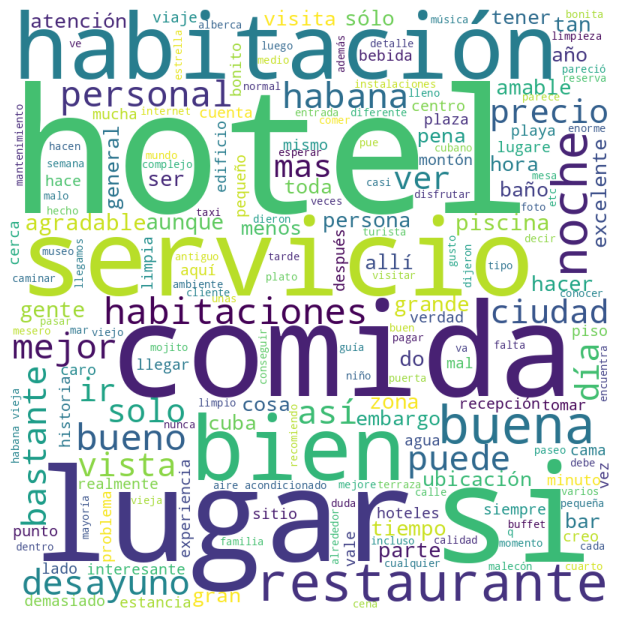

Palabras más recurridas de la clase : 5


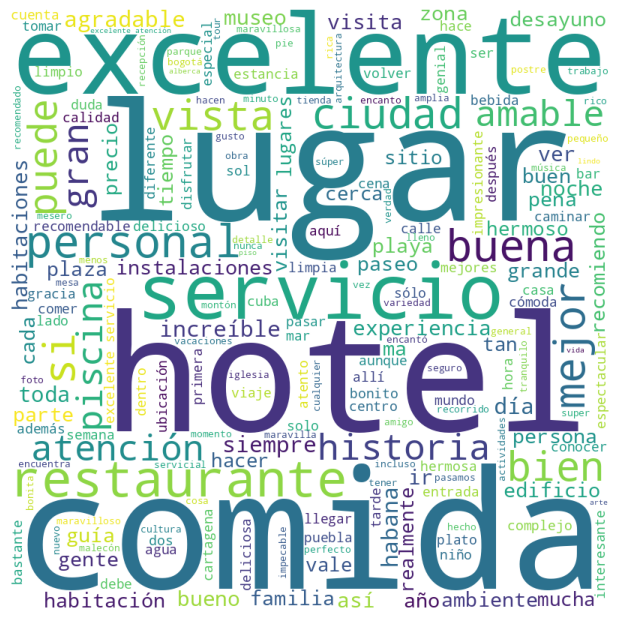

Palabras más recurridas de la clase : 1


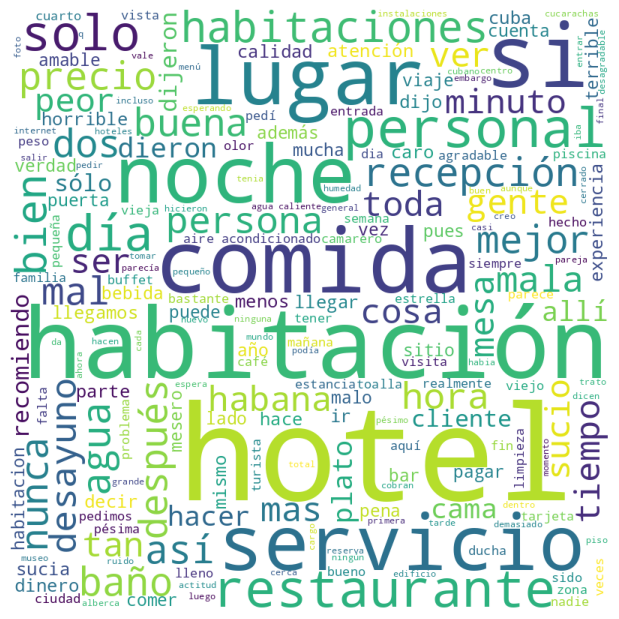

Palabras más recurridas de la clase : 4


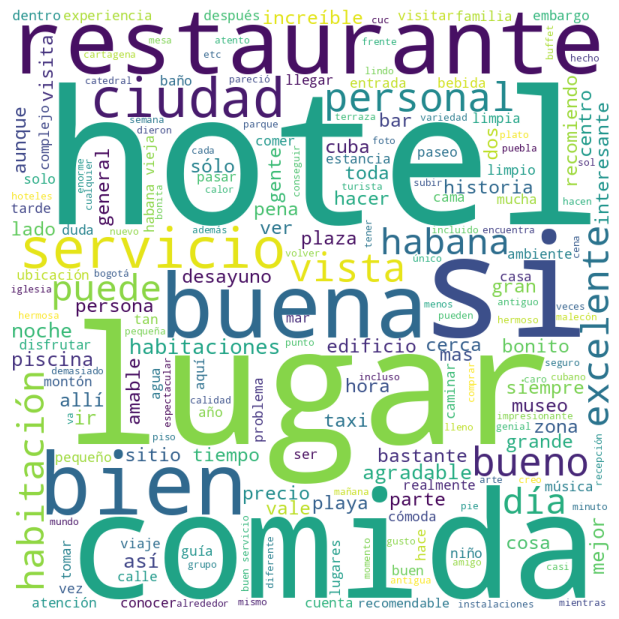

Palabras más recurridas de la clase : 2


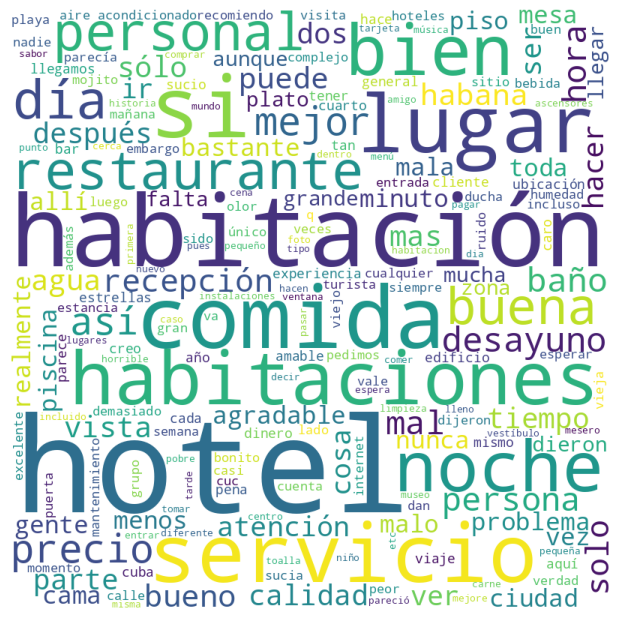

In [11]:
stop_words = stopwords.words('spanish')
for i in train['Class'].unique():
  print(f'Palabras más recurridas de la clase : {i}')
  show_graph(train.loc[train['Class']==i,'Review'],stopwords = stop_words)

De estas gráficas, podemos ver que palabras como habitación, hotel, lugar y comida son muy recurrentes a la hora de hacer reseñas de parte de los clientes.

## **2.2 Limpieza de datos**

### Separación de Datos con Variable Objetivo

In [12]:
x_train = train['Review']
y_train = train['Class']
x_test = test['Review']
y_test = test['Class']

In [13]:
# @title Quitar datos duplicados
train = train.drop_duplicates()
train.shape

(6248, 2)

### Eliminar caracteres que no pertenezcan al código ASCII

Se eliminan aquellos caracteres que no pertenezcan al código ASCII con el objetivo de no perturbar los modelos con caracteres que no reconozca, por lo que es mejor mantener las palabras en un alcance definido como es el código ASCII

In [14]:
def remove_non_ascii(words):
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

### Convertir todos los caractéres a minúsculas

Se realiza esta conversión con el objetivo de evitar que el modelo le dé diferentes significados a varias palabras únicamente por su capitalización (ej: Hotel y hotel)

In [15]:
def lowercase(words):
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

### Remover puntuación

Se realiza este paso debido a que al modelo no le es relevante los signos de puntuación, por lo que se pueden omitir dichos signos

In [16]:
def remove_punctuation(words):
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

### Reemplazar números

Se realiza este paso para que el modelo no se confunda con variables categóricas, por lo que los modelos solo recibirán palabras constituidas por letras

In [17]:
def replace_numbers(words):
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

### Remover Stop Words


Las "stop words" en un modelo de procesamiento de lenguaje natural (NLP, por sus siglas en inglés) son palabras que se filtran antes o después del procesamiento del texto. Cuando construimos el vocabulario de un modelo, las "stop words" son las palabras que excluimos. Generalmente, estas palabras son muy comunes en el lenguaje (como "en", "y", "a", "el", "la", etc. en español) y no contienen información importante para entender el contexto de un texto. Por lo tanto, se eliminan para reducir la cantidad de ruido en los datos y mejorar la eficiencia del modelo. Sin embargo, en algunos casos, como en el análisis de sentimientos, las "stop words" pueden ser útiles y se mantienen.

In [18]:
def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

Se juntan todos los procesos anteriores para obtener el preprocesamiento completo después de haber hecho el tokenizado y antes de haber hecho el lematizado

In [19]:
def full_preprocessing(words):
  words = lowercase(words)
  words = remove_punctuation(words)
  words = remove_non_ascii(words)
  words = remove_stopwords(words)
  return words

### Tokenización

La tokenización es el proceso de sustituir los datos sensibles por símbolos de identificación únicos que conservan toda la información esencial de los datos sin comprometer la seguridad.

Se realizará un tokenizado de palabras (separar cada palabra y/o caracter de la frase por comas) y luego se aplicará el preprocesamiento mencionado anteriormente

In [20]:
x_train_n = x_train.apply(word_tokenize)

In [21]:
x_train_n = x_train_n.apply(full_preprocessing)

### Lematización

La lematización es un proceso en el procesamiento del lenguaje natural que consiste en reducir las palabras a su forma base o raíz, conocida como "lema". Por ejemplo, las palabras "corriendo", "corrió" y "correrá" se lematizan a "correr".

La lematización ayuda a reducir la dimensionalidad de los datos de texto y a agrupar palabras similares, lo que puede mejorar la eficacia de muchos algoritmos de NLP.

In [22]:
def stem_words(words):
  stemmer = SnowballStemmer('spanish')
  stems = []
  for word in words:
    stem = stemmer.stem(word)
    stems.append(stem)
  return stems

In [23]:
def lemmatize_verbs(words):
  lemmatizer = WordNetLemmatizer()
  lemmas = []
  for word in words:
    lemma = lemmatizer.lemmatize(word,pos='v')
    lemmas.append(lemma)
  return lemmas

In [24]:
def full_lematize(words):
  words = stem_words(words)
  words = lemmatize_verbs(words)
  return words

### Aplicar Lematizado

In [25]:
x_train_n = x_train_n.apply(full_lematize)

In [26]:
train['Transformed'] = x_train_n.apply(lambda x: ' '.join(map(str,x)))

<ipython-input-26-6a5aca668ed5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Transformed'] = x_train_n.apply(lambda x: ' '.join(map(str,x)))


## Encoding Utilizado

Se realizará una transformación binaria 1 a 1, a cada caracter se le asigna un valor binario único. Esto es el equivalente a realizar una bolsa de palabras como forma de transformación y permite hacer una comparación de cadenas

In [27]:
count_vectorizer = CountVectorizer(binary=True)
x_count_vectorizer = count_vectorizer.fit_transform(train['Transformed'])

In [28]:
x_count_vectorizer.shape

(6248, 13193)

Esto permite ver que existen 13193 caracteres únicos que serán ingresados al modelo, junto con 6248 datos.

# **3. Modelado y evaluación. (20%)**

## Construcción de Pipeline

En primer lugar, y con el objetivo de automatizar varios procesos, en concreto la entrada de nuevos datos y la transformación de datos de prueba (que aún no se ha realizado y podría consumir mucho tiempo de implementación), se hará la implementación de un pipeline resumiendo todos los pasos que se hicieron en la limpieza, tokenización y lematización del texto, Así mismo se incluirá la transformación de la bolsa de palabras utilizando el conteo de vectores.

De este modo se logra que a través de la construcción de un nuevo pipeline, que se le asigna a cada modelo, se introduzca el modelo a implementar y se permita hacer de forma más rápida

In [42]:
class TextCleaning(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    #Transformación a clase del método remove_non_ascii realizado anteriormente
    def remove_non_ascii(self, words):
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    #Transformación a clase del método lowercase realizado anteriormente
    def lowercase(self, words):
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    #Transformación a clase del método remove_punctuation realizado anteriormente
    def remove_punctuation(self, words):
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    #Transformación a clase del método replace_numbers realizado anteriormente
    def replace_numbers(self, words):
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

  #Transformación a clase del método remove_stopwords realizado anteriormente
    def remove_stopwords(self, words):
        new_words = []
        for word in words:
            if word not in self.stopwords:
                new_words.append(word)
        return new_words

  #Transformación a clase del método stem_words realizado anteriormente
    def stem_words(self, words):
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    #Transformación a clase del método lemmatize_verbs realizado anteriormente
    def lemmatize_verbs(self, words):
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

  #Transformación a clase del método full_preprocessing realizado anteriormente
    def full_preproccesing(self, words):
        words = self.remove_non_ascii(words)
        words = self.lowercase(words)
        words = self.remove_punctuation(words)
        words = self.replace_numbers(words)
        words = self.remove_stopwords(words)
        return words

  #Transformación a clase del método full_lematize realizado anteriormente
    def full_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    def fit(self,x,y=None):
      return self

    def transform(self,x,y=None):
        x_train_n = pd.Series(x)
        x_train_n = x_train_n.apply(contractions.fix)
        x_train_n = x_train_n.apply(word_tokenize)
        x_train_n = x_train_n.apply(lambda x: self.full_preproccesing(x))
        x_train_n = x_train_n.apply(lambda x: self.full_lemmatize(x))
        x_train_n = x_train_n.apply(lambda x: ' '.join(map(str, x)))
        return x_train_n

In [47]:
#EJEMPLO IMPLEMENTACIÓN PIPELINE - SOLO ES PARA Q SE GUIEN
estimators = [
        ('preproccessing',TextCleaning()),
        ('transforming',CountVectorizer(lowercase=False)),
        ('classifier_model', SVC(kernel='rbf', probability=True))
    ]

In [ ]:
#EJEMPLO PARA CORRER
pip = Pipeline(estimators)
pip.fit(x_train,y_train)

## 3.1 Primer Modelo implementado - Naive Bayes (Felipe Rueda)

El modelo Naive Bayes es fácil de construir, muy rápido y adecuado para conjuntos de datos muy grandes. A pesar de su simplicidad, a menudo funciona sorprendentemente bien y se utiliza ampliamente porque a menudo supera a métodos de clasificación más sofisticados.

En el análisis de texto, el modelo Naive Bayes se utiliza a menudo para la clasificación de spam, el análisis de sentimientos y la categorización de documentos. En estos casos, las “características” son generalmente las palabras o n-gramas del documento a clasificar.

In [29]:
# @title separacion de variable predictoria y los textos a utilizar
df['Review_Normalizado'] = df['Review_Normalizado'].apply(lambda x: ' '.join(map(str, x)))
df

KeyError: 'Review_Normalizado'

In [ ]:
X_data, y_data = df['Review_Normalizado'],df['Class']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_data,y_data, test_size=0.2, random_state=42)
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [ ]:
# @title Generar modelo
model = MultinomialNB()
model.fit(X_train_vec, y_train)

In [ ]:
accuracy = model.score(X_test_vec, y_test)
print("Accuracy:", accuracy)

In [ ]:
model_2 = GaussianNB()

In [ ]:
model_2.fit(X_train_vec.toarray(), y_train)

In [ ]:
accuracy = model_2.score(X_test_vec.toarray(), y_test)
print("Accuracy:", accuracy)

## 3.2 Segundo Modelo implementado

## 3.3 Tercer Modelo implementado

# **4. Resultados. (20%)**

# **5. Mapa de actores relacionado con el producto de datos creado. (10%)**

# **6.Trabajo en equipo (8%)**

Preparación